In [496]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [497]:
from pyknon.genmidi import Midi
from pyknon.music import NoteSeq, Note
import random
from music21 import *
from urllib.parse import urlparse
from IPython.core.display import display, HTML
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import nltk
nltk.download('vader_lexicon')

us['musicxmlPath'] = 'bin\\MuseScore.exe'
us['musescoreDirectPNGPath'] = 'bin\\MuseScore.exe'

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Andtek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [498]:
chromatic = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"] + chromatic + chromatic

In [499]:
def make_midi(notes, filename):
	notes1 = map(Note, notes)
	midi = Midi(1, tempo=90)
	midi.seq_notes(notes1, track = 0)
	midi.write(filename)

In [500]:
def play_midi(filename):
	mf = midi.MidiFile()
	mf.open(filename)
	mf.read()
	mf.close()
	s = midi.translate.midiFileToStream(mf)
	s.show('midi')

# Compose_chord_base

First, a progression is created calling compose_progression_from_word, which subsets the letters of the word that are included in the diatonic scale. <br>
Second, the intervals are created in order to put together the chord. <br>
According if the sentiment of the meaning is positive or negative a major or minor chord progression will be created <br>
If the word has less than 3 letters included in the diatonic scale, a random sample of the chromatic scale will be drawn in accordance with the meaning <br> 
i.e. if the meaning is positive the chords will be major, otherwise they will be minor. <br>

positive sentiment: compound score >= 0.05 <br>
neutral sentiment: (compound score > -0.05) and (compound score < 0.05) <br>
negative sentiment: compound score <= -0.05 <br>
LEXICON https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt

In [501]:
def compose_progression_from_word(word):
	result = []
	for char in word.upper():
		if char in ["A","B","C","D","E","F","G"]:
			result.append(char)
	if result:
		return result
	else:
		return random.sample(chromatic, 4)

In [502]:
def compose_chord_base(word, meaning, string=False):
   
    progression = compose_progression_from_word(word)
    harmony = stream.Stream()
    happyChords = []
    sadChords = []
    
    for base in progression:
        
        chord_string = base
        index = chromatic.index(base)
        
        
        # In order to have a consonant chord it's necessary to define the musical intervals
        tonic = chromatic[chromatic.index(chord_string.upper())]
        thirdMaj = chromatic[chromatic.index(chord_string.upper()) + 4]
        thirdMin =  chromatic[chromatic.index(chord_string.upper()) + 3]
        fifthPerf = chromatic[chromatic.index(chord_string.upper()) + 7]
        
        
        # Lexicon Sentiment Integration
        sid = SentimentIntensityAnalyzer()
        sentiment = sid.polarity_scores(meaning)
        
        
        # Sad chords creation
        if sentiment["compound"] >= 0.05:
            happyChords.append(chord.Chord([tonic,thirdMaj,fifthPerf]))
        else:
            sadChords.append(chord.Chord([tonic,thirdMin,fifthPerf]))

            
    # In order to have a musical harmony with more richness the quantity of notes in the word 
        # will be considered. If it's less than 3 notes other chords will be included at random in accordance with the
            # Sentiment.

    if len(progression) <= 3 and sentiment["compound"] < 0.05 and  sentiment["compound"] > -0.05 :
        chord1 = random.sample(chromatic, 1)
        chord2 = random.sample(chromatic, 1)
        chord3 = random.sample(chromatic, 1)
        chord4 = random.sample(chromatic, 1)
        
        triadMin1 = chord.Chord(
        [str(chord1[0]), 
         chromatic[chromatic.index(str(chord1[0])) + 3],  
         chromatic[chromatic.index(str(chord1[0])) + 7]])
        
        triadMaj2 = chord.Chord(
        [str(chord2[0]), 
         chromatic[chromatic.index(str(chord2[0])) + 4],  
         chromatic[chromatic.index(str(chord2[0])) + 7]])
        
        triadMin3 = chord.Chord(
        [str(chord3[0]), 
         chromatic[chromatic.index(str(chord3[0])) + 3],  
         chromatic[chromatic.index(str(chord3[0])) + 7]])
        
        triadMaj4 = chord.Chord(
        [str(chord4[0]), 
         chromatic[chromatic.index(str(chord4[0])) + 4],  
         chromatic[chromatic.index(str(chord4[0])) + 7]])
        
        return(triadMin1,triadMaj2,triadMin3,triadMaj4)
    
    
    
    elif len(progression) <= 3 and sentiment["compound"] <= 0.05:
        chord1 = random.sample(chromatic, 1)
        chord2 = random.sample(chromatic, 1)
        chord3 = random.sample(chromatic, 1)
        chord4 = random.sample(chromatic, 1)
        
        triadMin1 = chord.Chord(
        [str(chord1[0]), 
         chromatic[chromatic.index(str(chord1[0])) + 3],  
         chromatic[chromatic.index(str(chord1[0])) + 7]])
        
        triadMin2 = chord.Chord(
        [str(chord2[0]), 
         chromatic[chromatic.index(str(chord2[0])) + 3],  
         chromatic[chromatic.index(str(chord2[0])) + 7]])
        
        triadMin3 = chord.Chord(
        [str(chord3[0]), 
         chromatic[chromatic.index(str(chord3[0])) + 3],  
         chromatic[chromatic.index(str(chord3[0])) + 7]])
        
        triadMin4 = chord.Chord(
        [str(chord4[0]), 
         chromatic[chromatic.index(str(chord4[0])) + 3],  
         chromatic[chromatic.index(str(chord4[0])) + 7]])
        
        return(triadMin1,triadMin2,triadMin3,triadMin4)
    
    
    elif len(progression) <= 3 and sentiment["compound"] >= 0.05:      
        chord1 = random.sample(chromatic, 1)
        chord2 = random.sample(chromatic, 1)
        chord3 = random.sample(chromatic, 1)
        chord4 = random.sample(chromatic, 1)
        
        triadMaj1 = chord.Chord(
        [str(chord1[0]), 
         chromatic[chromatic.index(str(chord1[0])) + 4],  
         chromatic[chromatic.index(str(chord1[0])) + 7]])
        
        triadMaj2 = chord.Chord(
        [str(chord2[0]), 
         chromatic[chromatic.index(str(chord2[0])) + 4],  
         chromatic[chromatic.index(str(chord2[0])) + 7]])
        
        triadMaj3 = chord.Chord(
        [str(chord3[0]), 
         chromatic[chromatic.index(str(chord3[0])) + 4],  
         chromatic[chromatic.index(str(chord3[0])) + 7]])
        
        triadMaj4 = chord.Chord(
        [str(chord4[0]), 
         chromatic[chromatic.index(str(chord4[0])) + 4],  
         chromatic[chromatic.index(str(chord4[0])) + 7]])
        
        return(
            triadMaj1,triadMaj2,triadMaj3, triadMaj4)
   
    elif len(happyChords) == 0:
        return(sadChords)
    else:
        return(happyChords)
    
        

In [503]:
def create_melody(word, meaning, string=False):
    return 0

In [504]:
%%javascript
IPython.notebook.kernel.execute("URL = '" + window.location + "'");

<IPython.core.display.Javascript object>

In [505]:
try:
    word, meaning = str(urlparse(URL).query).replace("%20"," ").split("=")
except:
    word, meaning = "Water - Sky, Ocean, Beautiful".split(" - ")

In [506]:
chord_base = compose_chord_base(word, meaning)

Chord Base:


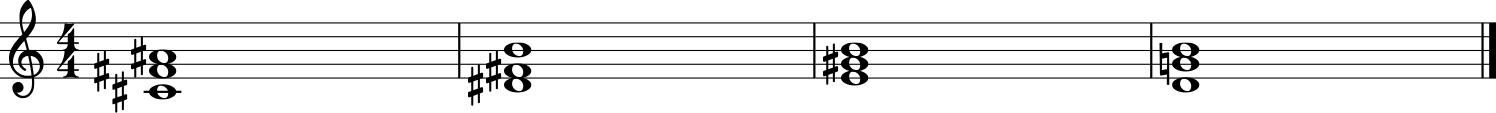

F#-major triad
B-major triad
E-major triad
G-major triad


In [507]:
# REFERENCE http://web.mit.edu/music21/doc/usersGuide/usersGuide_07_chords.html

display(HTML('<h1><center>' + f"{word} <br>{meaning}" + '</center></h1>'))
print("Chord Base:")
#chord_base[0].show()

for i in chord_base:
    i.duration.type = "whole"
stream1 = stream.Stream()
stream1.append(chord_base)
stream1.duration.type = "whole"
stream1.quarterLength
stream1.show()


stream1.show("midi")
stream1.write()
for chord in stream1:
    print(chord.pitchedCommonName)